# Chapter 04. 다양한 분류 알고리즘

## 04-2. 확률적 경사 하강법

### 점진적 학습 알고리즘
- 확률적 경사 하강법 (Stochastic Gradient Descent)
<br> : 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 경사를 조금 내려가며 전체 샘플을 학습하는 것.
<br> 이때 훈련 세트를 한 번 모두 사용하는 과정을 에포크 epoch 라고 함.
<br> * 여러 개의 샘플을 사용해 경사 하강법을 하는 방식은 '미니배치 경사 하강법'(Minibatch Gradient Descent).
<br> ** 극단적으로 한 번 경사로를 따라 전체 샘플을 사용해 경사 하강법을 하는 방식은 '배치 경사 하강법' (Batch Gradient Descent).

### 손실 함수 
- 손실함수 Loss Function
<br> : 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준
<br> : 손실함수의 값은 작을수록 좋음. 단 최소값은 알 수 없음.
<br> * 손실함수는 미분가능해야 하므로 연속적이어야 한다.

### 로지스틱 손실 함수
- 로지스틱 손실 함수 Logistic Loss Function = 이진 크로스엔트로피 손실 함수 Binary Cross-Entropy Loss Fuction
<br> * 타깃 =1 : -log(예측확률)
<br> * 타깃 =0 : -log(1-예측확률)
- 크로스엔트로피 손실 함수 Cross Entropy Loss Function : 다중 분류에서 사용하는 손실 함수

## SGDClassifier

#### 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
fish = pd.read_csv('http://bit.ly/fish_csv_data')

In [3]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

#### 데이터 분할

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

#### 표준화 전처리

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
ss = StandardScaler()

In [8]:
ss.fit(train_input)

StandardScaler()

In [9]:
train_scaled = ss.transform(train_input)

In [10]:
test_scaled = ss.transform(test_input)

#### 확률적 경사 하강법 : SGDClassifier
- loss = 'log' : 로지스틱 손실 함수
- max_iter : 에포크 횟수 지정

In [11]:
from sklearn.linear_model import SGDClassifier

In [12]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)

In [13]:
sc.fit(train_scaled, train_target)

C:\Users\haeun\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(loss='log', max_iter=10, random_state=42)

In [14]:
print(sc.score(train_scaled, train_target))

0.773109243697479


In [15]:
print(sc.score(test_scaled, test_target))

0.775


In [16]:
sc.partial_fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=10, random_state=42)

In [17]:
print(sc.score(train_scaled, train_target))

0.8151260504201681


In [18]:
print(sc.score(test_scaled, test_target))

0.85


## 에포크와 과대 / 과소 적합
- 확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다.
- 과대적합 시작하기 전에 훈련을 멈춰주어야 함. (조기 종료)

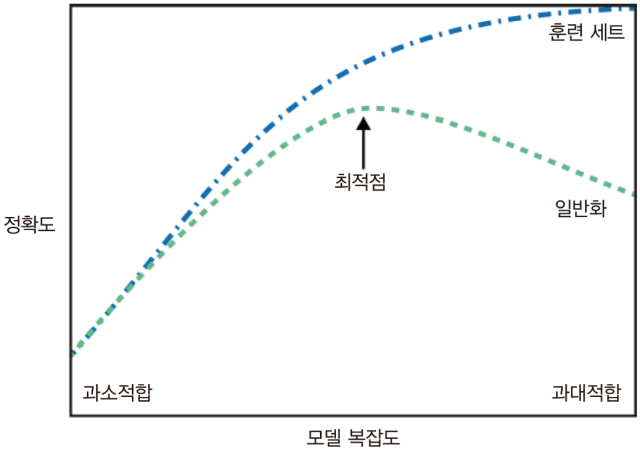

In [19]:
import numpy as np

In [20]:
sc = SGDClassifier(loss='log', random_state=42)

In [21]:
train_score=[]

In [22]:
test_score=[]

#### classes
- fit() 메서드를 사용하지 않고 partial_fit() 메서드만 사용하는 경우, <br>
 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit() 메서드에 전달해주어야 함.

In [23]:
classes = np.unique(train_target)

In [24]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

In [25]:
import matplotlib.pyplot as plt

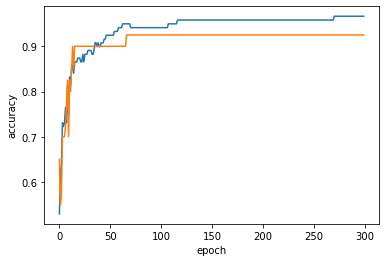

In [26]:
plt.plot(train_score)   # 파랑
plt.plot(test_score)   # 주황
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [27]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)   # tol=None : 최솟값 지정 X
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [28]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


#### 힌지 손실 Hinge Loss 
- 서포트 벡터 머신에서 쓰는 손실 함수 SVM (Support Vector Machine)

In [29]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)

In [30]:
sc.fit(train_scaled, train_target)

SGDClassifier(max_iter=100, random_state=42, tol=None)

In [31]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
